# 循环神经网络的简洁实现


虽然 `sec_rnn_scratch`
对了解循环神经网络的实现方式具有指导意义，但并不方便。
本节将展示如何使用深度学习框架的高级API提供的函数更有效地实现相同的语言模型。
我们仍然从读取时光机器数据集开始。


In [1]:
import torch
from torch import nn
from torch.nn import functional as F
# from d2l import torch as d2l

import sys
sys.path.append("..")
import d2lzh_pytorch.torch as d2l

import d2lzh_pytorch.load_chinese_txt_data as load_chinese  # 加载中文训练数据
import d2lzh_pytorch.rnn_train_chinese as train_chinese  # 加载训练模块
from d2lzh_pytorch.rnn_model import RNNModel  # 加载RNN模型


# 驱动
device = d2l.try_gpu()

In [2]:
batch_size = 32
num_steps = 35


# 加载数据
txtPath = "/mnt/g2t/ai_data/txtBook/贾平凹-山本.txt"
stopwords_file = "/mnt/g2t/ai_data/txtBook/stopwords.txt"
train_iter, vocab = load_chinese.load_data_time_machine(batch_size,
                                                        num_steps,
                                                        txtPath,
                                                        stopwords_file)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.238 seconds.
Prefix dict has been built successfully.


load vocabulary success. len(vocab): 3577


## RNN模型定义

我们定义一个RNN模型, 当前模块已经封装在d2l包中

In [4]:
# 网络层定义
num_hiddens = 512

rnn_layer = nn.RNN(len(vocab), num_hiddens)


# RNN模型
net = RNNModel(rnn_layer, 
               vocab_size=len(vocab)
              )


# 转移到GPU
net = net.to(device)

很明显，这种模型根本不能输出好的结果。
接下来，我们使用 :numref:`sec_rnn_scratch`中
定义的超参数调用`train_ch8`，并且[**使用高级API训练模型**]。


Time consuming:  54.4388 秒
perplexity 3.2, 288689.1 tokens/sec on cuda:0
time<unk>tra<unk>eller猫山白河小山白花猫白猫丝丝猫水猫猫块外人一镇块五镇外阮头三滩城上边门满一下一个走十这头个井宗秀如展先
tra<unk>eller小山白河白河白着猫着猫二两里包头三间猫高头三色杨钟说行你生日爹到怨上碗三时兴地里爹死回人脸大爹井掌柜


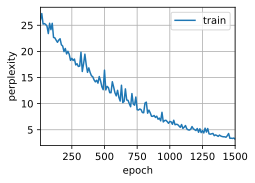

In [10]:
num_epochs = 5000
lr = 0.1


# 开始训练
train_chinese.train_ch8(net, train_iter,
                        vocab, lr,
                        num_epochs,
                        device
                        )

In [16]:
# 预测
train_chinese.predict_ch8('镇上', 20,
                          net, vocab, device
                          )

'镇上井掌柜提意家里酒生不出一条头说起饭先生说'

In [18]:
model_save_path = 'concise_RNN_23_4_23.pt'


# 保存训练的模型

# torch.save(net.state_dict(),  model_save_path)  # 推荐的文件后缀名是pt或pth

In [ ]:
# 加载模型
net = RNNModel(rnn_layer, vocab_size=len(vocab))

net.load_state_dict(torch.load(model_save_path))

In [ ]:
net

与上一节相比，由于深度学习框架的高级API对代码进行了更多的优化，
该模型在较短的时间内达到了较低的困惑度。

## 小结

* 深度学习框架的高级API提供了循环神经网络层的实现。
* 高级API的循环神经网络层返回一个输出和一个更新后的隐状态，我们还需要计算整个模型的输出层。
* 相比从零开始实现的循环神经网络，使用高级API实现可以加速训练。


In [ ]:
# 使用保存的模型 预测
net = net.to(device)


# 预测
d2l.predict_ch8('time traveller is', 40, 
                net, vocab, device
               )